## Previsão de Preço ##

## Price Forecast ##

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv('smartphones.csv')
df.head(n=1)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828


In [4]:
features = ['processor_speed', 'battery_capacity', 'screen_size', 'ram_capacity']


In [5]:
X = df[features]
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
imputer = SimpleImputer(strategy='mean')

In [8]:
# Ajuste o imputer aos seus dados de treinamento
imputer.fit(X_train)

SimpleImputer()

In [9]:
# Aplique o imputer aos seus dados de treinamento e teste
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [10]:
# Crie um modelo de regressão linear
model = LinearRegression()

In [11]:
# Treine o modelo com os dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Faça previsões com os dados de teste
y_pred = model.predict(X_test)

In [13]:
# Avalie o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 14974.435126790435
Mean Squared Error: 660806309.5638851


O MAE é uma medida da média das diferenças absolutas entre as previsões do modelo e os valores reais. Nesse caso, um MAE de 14,974.44 significa que, em média, **as previsões do modelo têm um erro de cerca de $14,974.44** em relação aos preços reais dos smartphones.

O MSE é uma medida que calcula a média das diferenças quadráticas entre as previsões do modelo e os valores reais. O MSE é sensível a valores discrepantes (outliers) e penaliza erros maiores com mais intensidade. Nesse caso, um MSE de **aproximadamente 660,806,309.56 indica que os erros quadráticos médios** das previsões do modelo são relativamente altos.

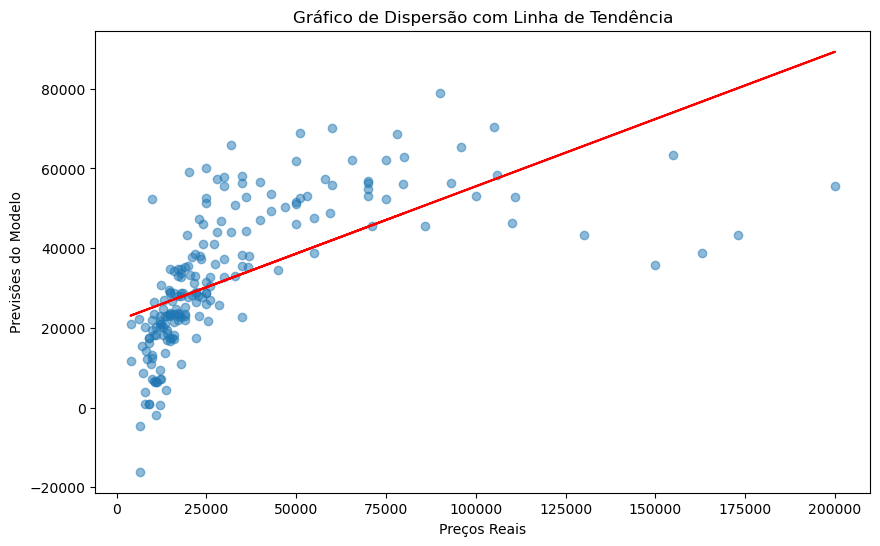

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Preços Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Gráfico de Dispersão com Linha de Tendência')

# linha de tendência
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.show()